In [1]:
%pylab inline
import sys; sys.path.insert(0, "../")
import numpy as np
import time
from emcee.autocorr import *
from ensemble_sampler import *

import seaborn as sns
from pandas import DataFrame



Populating the interactive namespace from numpy and matplotlib


### Example of sampling from Rosenbrock density  
$f(x_1, x_2) \propto \exp(-[a(x_2 - x_1^2)^2 + (1-x_1)^2]\ / \ b)$  

In [2]:
dim = 2
nwalkers = 250
batch_size = 50
niters = 10000
t_dist = Rosenbrock()

##### Not using ensemble, use isotropic gaussian proposal with scale=0.2

In [3]:
proposal = PCNWalkMove(s=None, scale=0.2)
sampler = Sampler(dim=dim, t_dist=t_dist, proposal=proposal, nwalkers=nwalkers)

start = time.time()
sampler.run_mcmc(niters, p0=np.random.randn(dim*nwalkers).reshape([nwalkers, dim]), batch_size=batch_size, store=True)
print time.time() - start

2.93356895447


In [4]:
chain = sampler.t_dist.get_auto_corr_f(sampler._history.get('chain').reshape([niters*nwalkers, -1]))
try:
    print integrated_time(chain)
except AutocorrError, err:
    print err

[ 2981.79567363  5629.66074168]


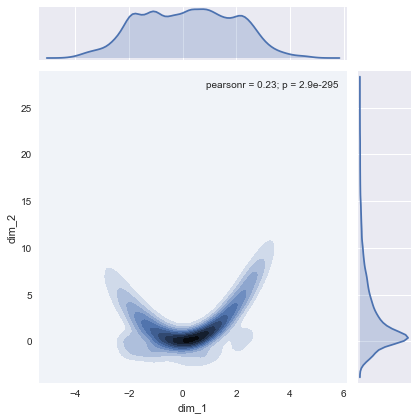

In [5]:
x, y = ['dim_1', 'dim_2']
df = DataFrame(np.vstack([chain[::100, 0], chain[::100, 1]]).T, columns=[x, y])
sns.jointplot(x=x, y=y, data=df, kind='kde')

#### Use ensemble of size 3, scale=0.2.

In [7]:
proposal = PCNWalkMove(s=3, scale=0.2)
sampler = Sampler(dim=dim, t_dist=t_dist, proposal=proposal, nwalkers=nwalkers)

start = time.time()
sampler.run_mcmc(niters, p0=np.random.randn(dim*nwalkers).reshape([nwalkers, dim]), batch_size=batch_size, store=True)
print time.time() - start

7.33746290207


In [8]:
chain = sampler.t_dist.get_auto_corr_f(sampler._history.get('chain').reshape([niters*nwalkers, -1]))
try:
    print integrated_time(chain)
except AutocorrError, err:
    print err

The chain is too short to reliably estimate the autocorrelation time


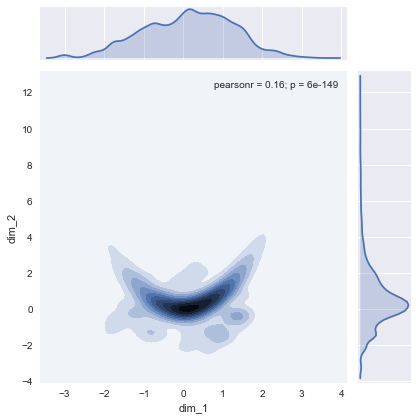

In [9]:
x, y = ['dim_1', 'dim_2']
df = DataFrame(np.vstack([chain[::100, 0], chain[::100, 1]]).T, columns=[x, y])
sns.jointplot(x=x, y=y, data=df, kind='kde')

#### Ensemble with pCN, beta=0.4   
This could come from the theory behind pCN sampling, i.e. it preserves the underlying Gaussian measure.

In [4]:
proposal = PCNWalkMove(s=3, beta=0.2)

sampler = Sampler(dim=dim, t_dist=t_dist, proposal=PCNWalkMove(s=None, scale=0.2), nwalkers=nwalkers)
sampler.run_mcmc(100, p0=np.random.randn(dim*nwalkers).reshape([-1, dim]), batch_size=batch_size, store=False)
p0 = sampler.history.curr_pos

sampler = Sampler(dim=dim, t_dist=t_dist, proposal=proposal, nwalkers=nwalkers)
start = time.time()
sampler.run_mcmc(niters, p0=p0, batch_size=batch_size, store=True)
print time.time() - start

7.11025691032


In [5]:
chain = sampler.t_dist.get_auto_corr_f(sampler._history.get('chain').reshape([niters*nwalkers, -1]))
from emcee.autocorr import integrated_time
try:
    print integrated_time(chain)
except AutocorrError, err:
    print err

The chain is too short to reliably estimate the autocorrelation time


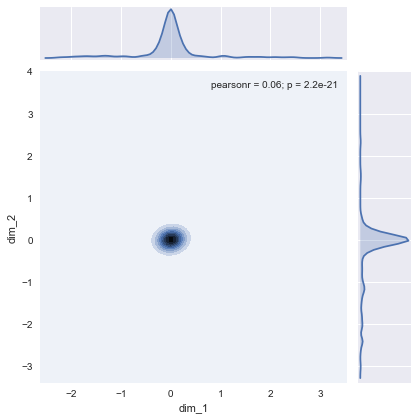

In [6]:
x, y = ['dim_1', 'dim_2']
df = DataFrame(np.vstack([chain[::100, 0], chain[::100, 1]]).T, columns=[x, y])
sns.jointplot(x=x, y=y, data=df, kind='kde')

#### Ensemble with pCN, more walkers.

In [27]:
nwalkers = 250
batch_size = 50

proposal=PCNWalkMove(s=3, beta=0.1, symmetric=True)
sampler = Sampler(dim=dim, t_dist=t_dist, proposal=proposal, nwalkers=nwalkers)

start = time.time()
sampler.run_mcmc(niters, p0=np.random.randn(dim*nwalkers).reshape([nwalkers, dim]), batch_size=batch_size, store=True)
print time.time() - start

7.07697796822


In [ ]:
chain = sampler.t_dist.get_auto_corr_f(sampler._history.get('chain').reshape([niters*nwalkers, -1]))
from emcee.autocorr import integrated_time
try:
    print integrated_time(chain)
except AutocorrError, err:
    print err

The chain is too short to reliably estimate the autocorrelation time


In [ ]:
x, y = ['dim_1', 'dim_2']
df = DataFrame(np.vstack([chain[:, 0], chain[:, 1]]).T, columns=[x, y])
sns.jointplot(x=x, y=y, data=df, kind='kde')

#### pCN without ensemble, beta=0.4  
Check affine invariance of pCN. Notice this does not totally make sense.

In [18]:
proposal = PCNWalkMove(s=None, beta=0.4)
sampler = Sampler(dim=dim, t_dist=t_dist, proposal=proposal, nwalkers=nwalkers)

start = time.time()
sampler.run_mcmc(niters, p0=np.random.randn(dim*nwalkers).reshape([nwalkers, dim]), batch_size=batch_size, store=True)
print time.time() - start

3.40712809563


In [19]:
chain = sampler.t_dist.get_auto_corr_f(sampler._history.get('chain').reshape([niters*nwalkers, -1]))
from emcee.autocorr import integrated_time
try:
    print integrated_time(chain)
except AutocorrError, err:
    print err

[  368.91324827  1486.22434433]


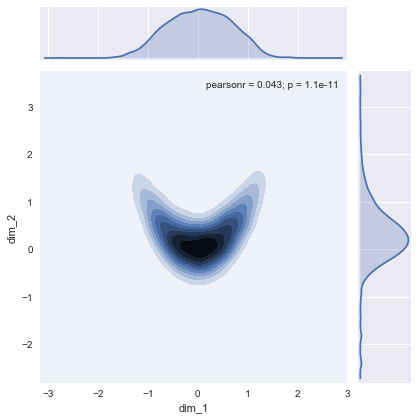

In [23]:
x, y = ['dim_1', 'dim_2']
df = DataFrame(np.vstack([chain[::100, 0], chain[::100, 1]]).T, columns=[x, y])
sns.jointplot(x=x, y=y, data=df, kind='kde')